# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


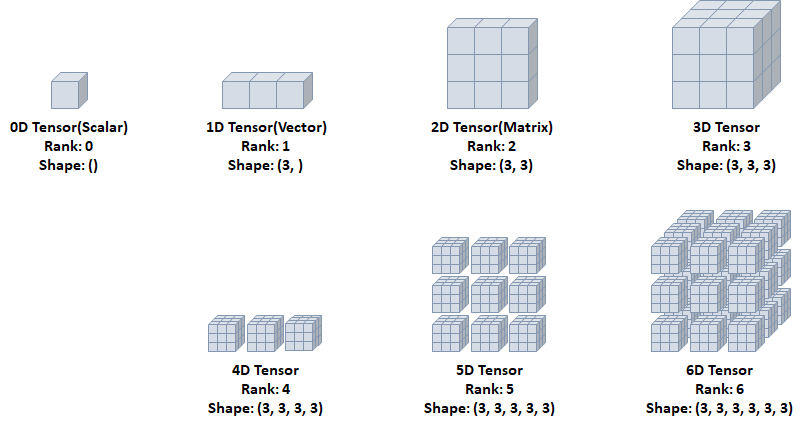

In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
# 텐서 초기화와 데이터 타입
x = torch.empty(4,2)
x

tensor([[-4.7825e+34,  3.0823e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  3.0823e-41],
        [ 1.1578e+27,  1.1362e+30]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.4704, 0.4788],
        [0.4760, 0.6211],
        [0.6518, 0.2266],
        [0.8819, 0.1716]])

In [ ]:
# 데이터 타입이 long이고 0으로 채워진 텐서
x = torch.zeros(4,2,dtype = torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor((4,2,0))
x

tensor([4, 2, 0])

In [ ]:
# 2 x 4 크기, double 타입, 1로 채워진 텐서
x = x.new_ones((2,4),dtype = torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
x = torch.ones((2,4),dtype = torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
x = torch.randn_like(x, dtype= torch.float)
x

tensor([[-1.1374,  2.7406, -2.3871,  1.4769],
        [ 1.2383,  0.2809,  0.4895, -0.5286]])

In [ ]:
# 텐서의 크기계산
x.size()

torch.Size([2, 4])

In [ ]:
x.shape

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.int())
print(ft.short())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [ ]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0990])
-0.0990104079246521
torch.float32


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
y = torch.ones_like(x,device = device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu',torch.double))

tensor([1.], device='cuda:0')
tensor([-0.0990], device='cuda:0')
tensor([0.9010], device='cuda:0')
tensor([0.9010], dtype=torch.float64)


In [ ]:
# 다차원 텐서 표현

# 0D Tensor (Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [ ]:
# 1D Tensor (Vector)

t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [ ]:
# 2D Tensor (Metrics)
t2 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3,4,5차원 텐서를 생성하여 출력하세요

In [ ]:
# 3D Tensor
t3 = torch.ones((3,3,3),dtype = torch.int)
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=torch.int32)


In [ ]:
# 4D Tensor
t4 = torch.ones((2,2,2,2),dtype = torch.int)
print(t4.ndim)
print(t4.shape)
print(t4)

4
torch.Size([2, 2, 2, 2])
tensor([[[[1, 1],
          [1, 1]],

         [[1, 1],
          [1, 1]]],


        [[[1, 1],
          [1, 1]],

         [[1, 1],
          [1, 1]]]], dtype=torch.int32)


In [ ]:
# 5D Tensor
t5 = torch.ones((2,2,2,2,2),dtype = torch.int)
print(t5.ndim)
print(t5.shape)
print(t5)

5
torch.Size([2, 2, 2, 2, 2])
tensor([[[[[1, 1],
           [1, 1]],

          [[1, 1],
           [1, 1]]],


         [[[1, 1],
           [1, 1]],

          [[1, 1],
           [1, 1]]]],



        [[[[1, 1],
           [1, 1]],

          [[1, 1],
           [1, 1]]],


         [[[1, 1],
           [1, 1]],

          [[1, 1],
           [1, 1]]]]], dtype=torch.int32)


In [ ]:
# 텐서의 연산

import math

a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a,-0.5,0.5))

tensor([[0.1466, 2.1183]])
tensor([[0.1466, 2.1183]])
tensor([[1., 3.]])
tensor([[0., 2.]])
tensor([[0.1466, 0.5000]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.std(a))
print(torch.mean(a))
print(torch.prod(a)) # 곱
print(torch.unique(torch.tensor([1,2,3,1,2,1,1,1])))

tensor([[0.1466, 2.1183]])
tensor(0.1466)
tensor(2.1183)
tensor(1.3942)
tensor(1.1324)
tensor(0.3105)
tensor([1, 2, 3])


[과제] 2차원 텐서 x,y를 생성해여 덧셈(add), 뺄셈(sub), 곱셈(prod), 나눗셈(div), 내적(matmul,mm) 연산 사례를 pytorch로 1개 이상씩 수행하세요.

In [ ]:
a = torch.tensor([[1,3],[6,8]])
b = torch.tensor([[4,6],[2,5]])

print('덧셈 : \n',torch.add(a,b))
print('뺄셈 : \n',torch.sub(a,b))
print('곱셈 : \n',torch.mul(a,b))
print('나눗셈 : \n',torch.div(a,b))
print('내적 : \n',torch.mm(a,b))

덧셈 : 
 tensor([[ 5,  9],
        [ 8, 13]])
뺄셈 : 
 tensor([[-3, -3],
        [ 4,  3]])
곱셈 : 
 tensor([[ 4, 18],
        [12, 40]])
나눗셈 : 
 tensor([[0.2500, 0.5000],
        [3.0000, 1.6000]])
내적 : 
 tensor([[10, 21],
        [40, 76]])


In [ ]:
# Manipulations

x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[:,0])
print(x[0,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor([1., 3.])
tensor([1., 2.])


In [ ]:
# view : 텐서의 크기(size)나 모양(shape)를 변경
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
print(x,'\n')
y = x.view(20)
print(y)

tensor([[ 0.8857, -0.2447,  0.0556,  0.5036,  0.5767],
        [-0.5788, -1.0924, -1.3056,  0.6671,  0.3906],
        [-0.8077, -0.2182, -1.3196,  0.1604, -0.7356],
        [-0.7318, -0.9462,  0.6182,  1.5389, -2.9553]]) 

tensor([ 0.8857, -0.2447,  0.0556,  0.5036,  0.5767, -0.5788, -1.0924, -1.3056,
         0.6671,  0.3906, -0.8077, -0.2182, -1.3196,  0.1604, -0.7356, -0.7318,
        -0.9462,  0.6182,  1.5389, -2.9553])


In [ ]:
z = x.view(5,-1)
z

tensor([[ 0.8857, -0.2447,  0.0556,  0.5036],
        [ 0.5767, -0.5788, -1.0924, -1.3056],
        [ 0.6671,  0.3906, -0.8077, -0.2182],
        [-1.3196,  0.1604, -0.7356, -0.7318],
        [-0.9462,  0.6182,  1.5389, -2.9553]])

In [ ]:
import torch

In [ ]:
# [과제]
x = torch.FloatTensor([
                       [1,2],
                       [3,4],
                       [5,6],
                       [7,8]
])
print(x)

# size를 활용한 텐서 사이즈 보기
print('size 활용', x.size())

# shape를 활용한 텐서 사이즈 보기
print('shape 활용', x.shape)

# dim을 활용한 텐서 차원 확인
print('dim 활용', x.dim())

# 0 차원 사이즈 확인
print('0 차원 사이즈 확인', x.size(0))
print('0 차원 사이즈 확인', x.shape[0])

# 1 차원 사이즈 확인
print('1 차원 사이즈 확인', x.size(1))
print('1 차원 사이즈 확인', x.shape[1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
size 활용 torch.Size([4, 2])
shape 활용 torch.Size([4, 2])
dim 활용 2
0 차원 사이즈 확인 4
0 차원 사이즈 확인 4
1 차원 사이즈 확인 2
1 차원 사이즈 확인 2


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.3159])
-1.3159366846084595
torch.float32


In [ ]:
# 스칼라값 하나만 존재해야 item() 사용가능
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([-0.0151, -1.7708])
torch.float32


In [ ]:
# squeeze : 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2436, 0.6992, 0.2793],
         [0.7628, 0.8538, 0.5340],
         [0.5537, 0.2496, 0.9057]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.2436, 0.6992, 0.2793],
        [0.7628, 0.8538, 0.5340],
        [0.5537, 0.2496, 0.9057]])
torch.Size([3, 3])


In [ ]:
# unsqueeze : 차원을 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.5738, 0.4758, 0.7007],
        [0.7362, 0.3936, 0.1393],
        [0.5482, 0.1949, 0.5164]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim = 2)
print(tensor)
print(tensor.shape)

tensor([[[0.5738],
         [0.4758],
         [0.7007]],

        [[0.7362],
         [0.3936],
         [0.1393]],

        [[0.5482],
         [0.1949],
         [0.5164]]])
torch.Size([3, 3, 1])


In [ ]:
tensor = t.unsqueeze(dim = 0)
print(tensor)
print(tensor.shape)

tensor([[[0.5738, 0.4758, 0.7007],
         [0.7362, 0.3936, 0.1393],
         [0.5482, 0.1949, 0.5164]]])
torch.Size([1, 3, 3])


In [ ]:
# stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- stack과 유사하지만 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b),dim = 0)
print(c)
print(c.shape)

tensor([[[-0.0724,  0.6446, -0.4631],
         [ 0.3593, -0.3786,  0.9178],
         [-0.2665,  0.4874,  1.1168]]])
tensor([[[-0.3816,  0.7515,  0.0352],
         [-2.1053, -0.2414,  1.4094],
         [-1.4127,  2.1205, -2.1866]]])
tensor([[[-0.0724,  0.6446, -0.4631],
         [ 0.3593, -0.3786,  0.9178],
         [-0.2665,  0.4874,  1.1168]],

        [[-0.3816,  0.7515,  0.0352],
         [-2.1053, -0.2414,  1.4094],
         [-1.4127,  2.1205, -2.1866]]])
torch.Size([2, 3, 3])


In [ ]:
d = torch.cat((a,b),dim = 1)
print(d)
print(d.shape)

tensor([[[-0.0724,  0.6446, -0.4631],
         [ 0.3593, -0.3786,  0.9178],
         [-0.2665,  0.4874,  1.1168],
         [-0.3816,  0.7515,  0.0352],
         [-2.1053, -0.2414,  1.4094],
         [-1.4127,  2.1205, -2.1866]]])
torch.Size([1, 6, 3])


In [ ]:
# chunk : 텐서를 여러 개로 나눌 때 사용(몇개로 나누는지 설정)
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor,3,dim = 1)
print(t1)
print(t2)
print(t3)

tensor([[0.8522, 0.1563, 0.3707, 0.4087, 0.4525, 0.0668],
        [0.3619, 0.5924, 0.2505, 0.2533, 0.3336, 0.4746],
        [0.5626, 0.9404, 0.9595, 0.8098, 0.6867, 0.1212]])
tensor([[0.8522, 0.1563],
        [0.3619, 0.5924],
        [0.5626, 0.9404]])
tensor([[0.3707, 0.4087],
        [0.2505, 0.2533],
        [0.9595, 0.8098]])
tensor([[0.4525, 0.0668],
        [0.3336, 0.4746],
        [0.6867, 0.1212]])


In [ ]:
# split : chunk와 동일한 기능이지만 조금 다른것은 나눠지는 텐서의 크기는 몇인가를 쓴다
t1, t2, t3 = torch.split(tensor,2,dim =1)
print(t1)
print(t2)
print(t3)

tensor([[0.8522, 0.1563],
        [0.3619, 0.5924],
        [0.5626, 0.9404]])
tensor([[0.3707, 0.4087],
        [0.2505, 0.2533],
        [0.9595, 0.8098]])
tensor([[0.4525, 0.0668],
        [0.3336, 0.4746],
        [0.6867, 0.1212]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함


In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu',torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b) # cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산
  
  https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

requires_grad 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작.  
기록을 추척하는 것을 중단하게 하려면 .detach()를 호출하여 연산기록으로부터 분리

In [ ]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-3.3128,  2.7924,  2.6123],
        [-2.0143,  3.1528, -3.3506],
        [-5.2855,  2.9614,  2.8995]])
False


requires_grad_(....)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경

In [ ]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙는다.
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.6966, 0.8094],
        [0.0047, 0.5743]])
tensor([[0.3826, 0.9266],
        [0.4100, 0.3453]])
tensor([[1.0792, 1.7360],
        [0.4147, 0.9196]])


In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산, 
print(a.requires_grad)
b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(95.9333, grad_fn=<SumBackward0>)


In [ ]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad = True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
out.backward() # 백워드를 통해서 역전파 계산이 가능

In [ ]:
# grad : 데이터가 가져온 layer에 대한 미분값 저장
print(x.grad) # 미분값

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


In [ ]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
# a = torch.tensor([[2.,2.],[2.,2.]],requires_grad=True)

In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.mean()
print(out)

tensor(9., grad_fn=<MeanBackward0>)


In [ ]:
out.backward()
print(a.grad)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [25]:
from torch.utils.data import Dataset, DataLoader

In [26]:
import torchvision.transforms as transforms
from torchvision import datasets

In [27]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std = (1.0,))])

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요


In [28]:
trainset = datasets.MNIST(root = './content',
                          train = True, download = True,
                          transform = mnist_transform)
testset = datasets.MNIST(root = './content',
                          train = False, download = True,
                          transform = mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./content/MNIST/raw/train-images-idx3-ubyte.gz to ./content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./content/MNIST/raw/train-labels-idx1-ubyte.gz to ./content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./content/MNIST/raw/t10k-images-idx3-ubyte.gz to ./content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./content/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/MNIST/raw



In [ ]:
!ls ./content/MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [31]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델학습을 할 때 batch_size 크기만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size = 8, shuffle=True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle=True, num_workers = 2)

In [32]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

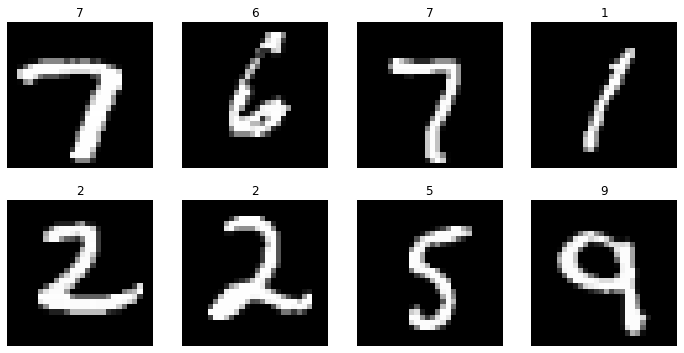

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(trainset),size = (1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap = 'gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [8]:
import torch
from torch import nn
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.7364,  1.8507,  0.3309,  ...,  0.5268,  0.2434, -1.0449],
        [-0.8862,  0.9653,  1.6926,  ..., -1.0666, -0.8651,  0.2096],
        [-0.1271,  0.1891,  0.0368,  ...,  0.0872,  0.6088,  0.2758],
        ...,
        [-1.2555,  0.2974, -0.0805,  ...,  0.2885, -1.4190, -1.2694],
        [ 0.9280, -0.1788,  1.5020,  ...,  1.4882,  1.9365, -1.5085],
        [ 0.7964, -2.2476, -1.4825,  ..., -0.7365, -0.2306, -0.1430]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.1739, -0.1884,  0.2069,  ..., -0.8216,  1.0436,  0.7908],
        [-0.7664, -0.2647, -0.6619,  ...,  0.8828,  0.1913, -0.5595],
        [ 0.6588,  0.0565, -1.1044,  ...,  0.2655,  0.0158, -0.8237],
        ...,
        [-0.1904, -0.0101,  0.1520,  ...,  0.2073, -0.2302, -0.4961],
        [-0.4840,  0.0882,  0.1070,  ..., -0.9450,  2.3166,  0.2330],
        [ 0.8096,  0.0491,  0.4920,  ..., -0.1155,  1.1254,  0.1537]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [9]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1


In [11]:
# dilation은 한 픽셀에서 다른 픽셀까지의 거리
m = nn.Conv2d(16,33,3,stride = 2)
m = nn.Conv2d(16,33,3,stride = (2,1), padding=(4,2))
m = nn.Conv2d(16,33,3,stride = (2,1), padding=(4,2), dilation = (3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [13]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 102])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈


In [14]:
nn.Conv2d(in_channels=1,out_channels = 20, kernel_size = 5, stride =1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [16]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [21]:
# weight 확인
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [22]:
# weight는 detach()를 통해 꺼내주어야 numpy() 변환가능
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

<function matplotlib.pyplot.show>

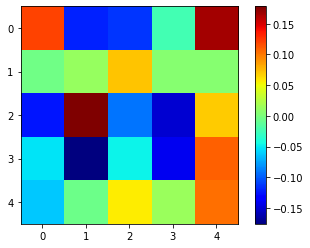

In [29]:
import matplotlib.pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show

In [35]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [39]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

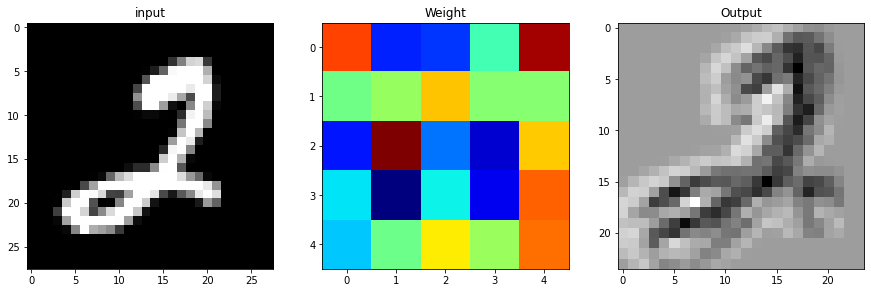

In [42]:
plt.figure(figsize = (15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:,],'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용


In [43]:
import torch.nn.functional as F

pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [44]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

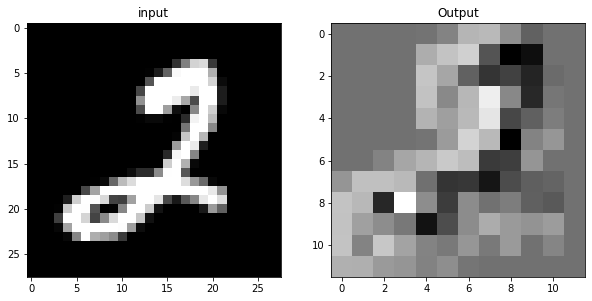

In [46]:
plt.figure(figsize = (10,30))

plt.subplot(121)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [47]:
# 선형 레이어(Linear layer) : 1d만 가능하므ㄹ .view()를 통해 1d로 펼쳐주어야 함
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [48]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [49]:
lin

tensor([[-0.3370,  0.3045, -0.1384, -0.6905, -0.2407,  0.2561,  0.1690, -0.2003,
          0.0215,  0.1958]], grad_fn=<AddmmBackward0>)

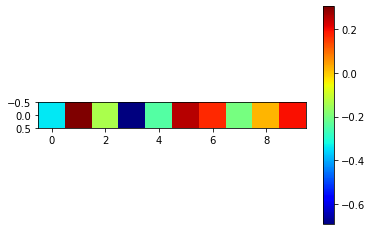

In [50]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

In [51]:
# 비선형 활성화(Non-linear Activation)
with torch.no_grad():
  flatten = input_image.view(1, 28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.0746, 0.1630, 0.1044, 0.0832, 0.0621, 0.1064, 0.1230, 0.1196, 0.0873,
         0.0763]])

In [55]:
import numpy as np

In [56]:
np.sum(softmax.numpy())

0.99999994

### 선형 회귀 모델

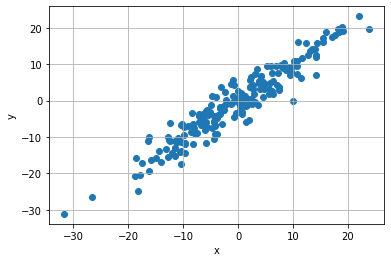

In [58]:
# 데이터 생성
X = torch.randn(200,1) *10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(),y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [69]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [70]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.8619]], requires_grad=True), Parameter containing:
tensor([-0.6909], requires_grad=True)]


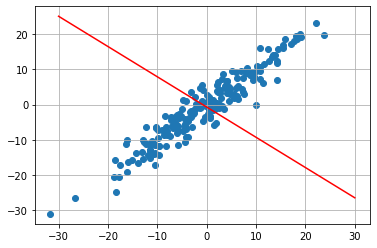

In [71]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

In [74]:
# 손실함수 및 옵티마이저 
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [75]:
# 모델 학습
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred,y)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

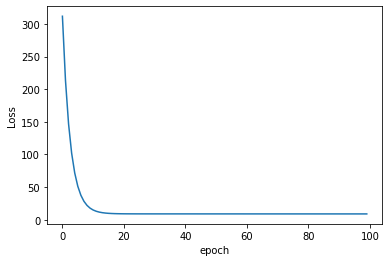

In [77]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

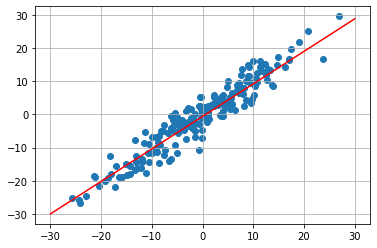

In [79]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

FashionMNIST 분류모델

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [83]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5))])

In [84]:
trainset = datasets.FashionMNIST(root = '/content/',
                                 train=True, download = True,
                                 transform = transform)
testset = datasets.FashionMNIST(root = '/content/',
                                 train=False, download = True,
                                 transform = transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [85]:
train_loader = DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 128, shuffle = False, num_workers = 2)

In [87]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고 next는 이터레이터에서 값을 차례대로 꺼냄
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

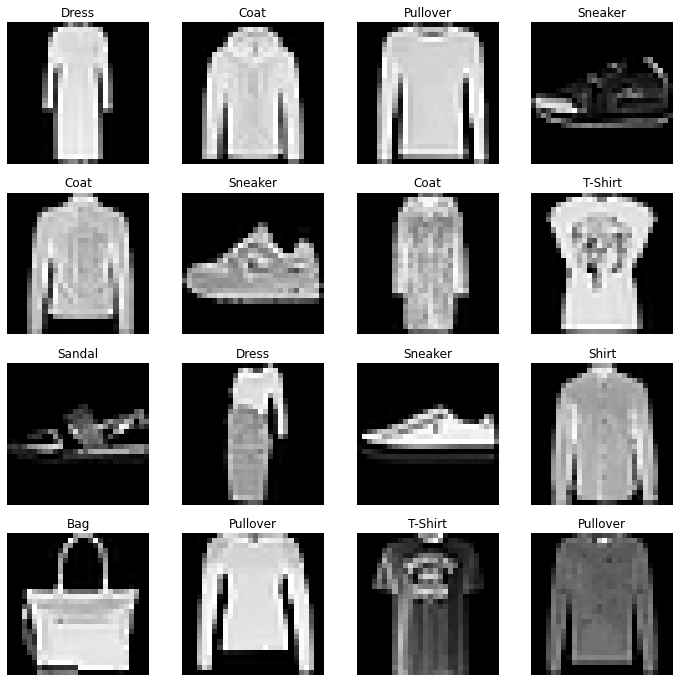

In [89]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize = (12,12))
cols , rows = 4,4
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap = 'gray')
plt.show()

In [110]:
# 모델 정의 및 파라미터
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5 , 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

net = NeuralNet()
print(net)


NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [111]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [112]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.1141,  0.0569,  0.0498, -0.0248,  0.0955, -0.0976,  0.0016,  0.0268,
          0.0524, -0.0488]], grad_fn=<AddmmBackward0>)


In [113]:
# 손실함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum= 0.9)

In [116]:
# 모델 학습
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [118]:
for epoch in range(10):

  running_loss = 0.0 # 초기화

  for i , data in enumerate(train_loader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print(f'Epoch: {epoch+1}, iter: {i+1}, Loss: {running_loss/2000}')
      running_loss = 0.0

Epoch: 1, iter: 100, Loss: 0.024335484936833383
Epoch: 1, iter: 200, Loss: 0.02529827632009983
Epoch: 1, iter: 300, Loss: 0.024000105142593382
Epoch: 1, iter: 400, Loss: 0.023941139727830886
Epoch: 2, iter: 100, Loss: 0.0237417059391737
Epoch: 2, iter: 200, Loss: 0.023705895744264127
Epoch: 2, iter: 300, Loss: 0.023543079406023026
Epoch: 2, iter: 400, Loss: 0.022879586666822434
Epoch: 3, iter: 100, Loss: 0.022664718106389047
Epoch: 3, iter: 200, Loss: 0.02207968507707119
Epoch: 3, iter: 300, Loss: 0.02243616622686386
Epoch: 3, iter: 400, Loss: 0.022311999648809432
Epoch: 4, iter: 100, Loss: 0.022402962505817414
Epoch: 4, iter: 200, Loss: 0.022112753093242645
Epoch: 4, iter: 300, Loss: 0.021547411486506463
Epoch: 4, iter: 400, Loss: 0.02130138698220253
Epoch: 5, iter: 100, Loss: 0.021214876160025598
Epoch: 5, iter: 200, Loss: 0.021134551659226418
Epoch: 5, iter: 300, Loss: 0.020806762099266053
Epoch: 5, iter: 400, Loss: 0.021021829277276992
Epoch: 6, iter: 100, Loss: 0.02081998063623905

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드


In [119]:
PATH = '/fashoin_mnist.pth'
torch.save(net.state_dict(), PATH)

In [120]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [121]:
net.patameters

AttributeError: ignored

In [122]:
# 모델 테스트

def imshow(image):
  image = image /2 + 0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) # rgb => gbr
  plt.show()

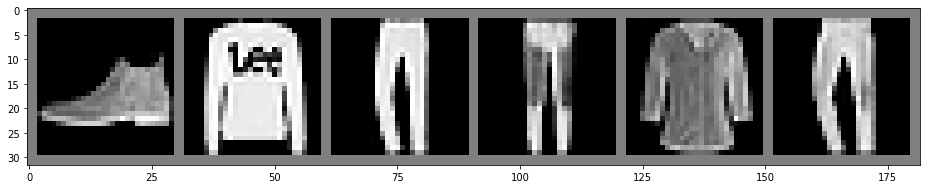

In [123]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [124]:
outputs = net(images)
_, predicted = torch.max(outputs,1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1,
        2, 6, 2, 6, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 3, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 2])


In [139]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Dress, Dress, Sneaker, Sandal, Bag, Coat, 


In [129]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct / total)

85.39
